<h1><center>Laboratorio 5: El Pandas no muerde (act. II) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza
- Auxiliar: Sebastián Tinoco.
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Javier Santidrián Salas
- Nombre de alumno 2: Patricio Yáñez Alarcón

### **Link de repositorio de GitHub:** https://github.com/jsantidrian/labs-Santidrian-Yanez

# Temas a tratar

- Manejo de datos tabulares usando `pandas`. En esta segunda parte se incluye adicionalmente agregaciones, concatenaciones, merge y trabajo con strings.
- Visualizaciones interactivas de los datos con `plotly`.

### Reglas:

- **Grupos de máximo 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas`.
- Utilizar `plotly` para obtener información gráfica del dataset.
- Aplicar el **Análisis Exploratorio de Datos** a un caso en particular.


> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd 

from IPython.display import display

#Libreria para visualizar
#!pip install --upgrade plotly
import plotly.figure_factory as ff
import plotly.express as px

# 1. Rendimiento en Estudiantes 📚


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>

Para este laboratorio deberán continuar el Análisis Exploratorio de datos sobre el conjunto ```students_grades```, el cual contiene una caracterización sobre el rendimiento y otros atributos de cada alumno de la *Universidad de la Cachaña* .

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
except: 
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Carga de Datos [0.5 Puntos]

Ya finalizado en análisis inicial, ud. y su equipo le entregaron a *Don Caguayo* (rector de la Universidad de la Cachaña) tanto los resultados del análisis como también la base de datos limpia y lista para ser almacenada. Dada la ingente cantidad de los datos, el equipo de TI de la universidad resolvió separar el dataset en dos bases de datos distintas (lo que según argumentan ellos, permitiría hacer agregaciones de forma más eficiente). 

Gracias a la excelente labor de ud. y su equipo en el análisis previo, el rector le solicita continuar el trabajo con una nueva batería de análisis. Por este motivo, la sección de TI les entrega nuevamente los datos. Sin embargo, argumentan que dada una escazes de personal, solo le entregarán *dumps* (copias) de cada base de datos y su equipo deberá unir las bases de datos. Los datos se encuentran en los siguiente archivos `.json`: `students_grades_1.json` y `students_grades_2.json`. 


Por ende, ud. y su equipo deciden que la primera tarea se centrará en cargar estos datos y unirlos. 

**No se preocupe por la limpieza ni transformar el tipo de datos de las columnas, ni tampoco transformar a notas chilenas**, recuerde que anteriormente ya se encargo de este tema.

In [3]:
#cargamos las bases
df_grades_1 = pd.read_json("/content/drive/My Drive/U/11 Semestre/Lab Progra/Labs/Lab 5 Pandas 2/students_grades_1.json")
df_grades_2 = pd.read_json("/content/drive/My Drive/U/11 Semestre/Lab Progra/Labs/Lab 5 Pandas 2/students_grades_2.json")

df_grades = pd.concat([df_grades_1,df_grades_2])

Resultado esperado:

In [4]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
470,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
471,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
472,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
473,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


## 1.2- Análisis de Las Notas v2 [2 Punto por Gráficos + 0.5 respuesta]

Preocupado por la dificultad que representa el graficar correctamente las notas, el rector le solicita implementar distintas alternativas de visualización.

Para esto, genere un [boxplot](https://plotly.com/python/box-plots/), un [displot](https://plotly.com/python/distplot/#distplot-with-pandas), un [histograma con un gráfico marginal de caja](https://plotly.com/python/histograms/#visualizing-the-distribution) y un [histograma con el ramo como faceta de fila](https://plotly.com/python/facet-plots/#histogram-facet-grids) que permitan visualizar las notas.

Luego, responda las siguientes pregunta: 

> 1. ¿Existe una diferencia notable entre las notas?

> 2. ¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres? ¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones como también en lo que usted y su equipo consideren correcto.

> Hint: Para elaborar el histograma, puede que le sea de utilidad hacer un `melt` del DataFrame, dejando como variables los ramos y valores las notas. Por otra parte, visiten la documentación para generar los gráficos.

**Gráfico de Caja:**

In [5]:
# Melt con variables los ramos y valores las notas
melted_df = pd.melt(
      frame = df_grades, 
      value_vars = ['math score', 'reading score', 'writing score'],
      value_name = 'Notas',
      var_name = 'Ramo'
)

# Boxplot
fig = px.box(
    data_frame = melted_df,
    x = 'Ramo',
    y = 'Notas',
    color = 'Ramo',
    title = 'Boxplot de notas por ramo'
)
fig.update_yaxes(title='Notas')
fig.update_xaxes(title='Ramos')
fig.show()

**Distplot:**

In [6]:
# Seleccionamos notas por cada ramo
x1 = df_grades.loc[:,'math score']
x2 = df_grades.loc[:,'reading score']
x3 = df_grades.loc[:,'writing score'] 

# Creamos histogramas por cada ramo
hist_data = [x1,x2,x3]
group_labels = ['math score','reading score','writing score']

# Distplot
fig = ff.create_distplot(
    hist_data, 
    group_labels,
    show_hist = False,
    show_rug = False
)
fig.update_layout(title="Distplot de notas por ramo")
fig.update_yaxes(title='Probabilidad')
fig.update_xaxes(title='Notas')
fig.show()

**Histograma con Boxplots:**

In [7]:
# Histograma con Boxplots
fig = px.histogram(
    data_frame = melted_df, 
    x = 'Notas',
    title = "Histograma con boxplot de notas por ramo",
    color = 'Ramo',
    marginal = 'box',
    barmode = 'group',
    nbins = 25
)
fig.show()

**Histograma con Faceta:**

In [8]:
# Histograma con Faceta
fig = px.histogram(
    data_frame = melted_df, 
    x = 'Notas',
    title = "Histograma de notas con ramo como faceta de fila",
    facet_row = 'Ramo',
    nbins = 25,
    color = 'Ramo',
    height = 550
)
fig.show()

**Justifique:**

```
> 1. ¿Existe una diferencia notable entre las notas?

R: No, las 3 notas tienen distribución y medidas de tendencia central muy similares.

> 2. ¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres?
¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones
como también en lo que usted y su equipo consideren correcto.

R: Al rector el gráfico de caja (muestra la distribución de notas y las medidas de tendencia central rápidamente,
pero requiere un poco más de conocimiento técnico para entender), a los padres el histograma con facetas
(simple y rápido para entender la distribución de las notas por cada ramo sin necesidad de entender boxplots),
mientras que al centro de estudios educativos el histograma con boxplots y el distplot (más técnico y específico
para estudiar la distribución y las medidas de tendencia central de las notas de cada ramo junto con su probabilidad).
```

# 2. Análisis por Nivel Educacional Etnia de los Padres

El rector, basado en su experiencia, cree fuertemente que el nivel educacional y la etnia de los padres influyen en las notas que obtienen sus hijos. 
Como científicos de datos, ud. y su equipo creen que deben encontrar evidencia para confirmar o refutar la hipótesis del rector.

Para esto, deciden generar dos análisis: una tabla de resumen por una parte y gráficos de caja por otro.

### 1.3.4 Tabla de Resumen [1 punto]

Para generar la tabla de resumen:

- [ ] Calcular el promedio de las notas y guardarlo en una variable `GPA` (grade point average).
- [ ] Hacer una simplificación a través de un mapeo (investigar el método `map()`) de la variable `parental level of education`  según la siguiente conversión: 

        some high school -> school
        some college -> school
        high school -> school
        bachelor's degree -> college
        associate's degree -> college
        master's degree -> postgraduate

  Los resultados de este mapeo deben ser guardados en la columna `simple parental level of education`.


- [ ] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener el promedio de las notas. 
- [ ] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener un conteo de los alumnos en cada grupo y agregarlos como una nueva fila count.
- [ ] Obtener el porcentaje de alumnos con respecto al total. Los porcentajes deben ser strings que contienen la frecuencia de cada grupo con respecto al total y deben ser terminados en '%'. 


Utilizar la tabla de resultados esperados como guía para desarrollar este punto.

In [9]:
# Función para calcular GPA
def alumnos_promedio(dataframe_in):
  #calculamos promedio redondeado al segundo decimal y asignamos como una nueva columna
  promedio = round(dataframe_in[['math score', 'reading score', 'writing score']].mean(axis=1),2)
  dataframe_in['GPA'] = promedio
  return dataframe_in

# Mostramos el nuevo dataframe
df_grades = alumnos_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


In [10]:
# Mapear la variable parental level of education según las reglas dadas
mapeo_educacion = {
    'some high school': 'school',
    'some college': 'school',
    'high school': 'school',
    "bachelor's degree": 'college',
    "associate's degree": 'college',
    "master's degree": 'postgraduate'
}
df_grades['simple parental level of education'] = df_grades['parental level of education'].map(mapeo_educacion)

df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,school
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,college
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,school
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,school
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,school
...,...,...,...,...,...,...,...,...,...,...,...
470,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,school
471,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,school
472,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,college
473,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,school


In [11]:
# Definir la función para obtener el porcentaje con formato
def get_percentage(count, total):
    return '{:.2%}'.format(count / total)

# Calcular los promedios, conteos y porcentajes por grupo
grouped = df_grades.groupby(['race/ethnicity', 'simple parental level of education']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean',
    'GPA':'mean',
    'names': 'count'
})

# Reconstruir índice y renombrar la columna
grouped = grouped.reset_index()
grouped.rename(columns={'names': 'count'}, inplace=True) 

# Calcular el total de alumnos y el porcentaje de cada grupo con respecto al total
total_students = len(df_grades)
grouped['percentage'] = grouped.apply(lambda row: get_percentage(row['count'], total_students), axis=1)

# Agregar una fila con los totales
totals = grouped.agg({'math score': 'mean',
                      'reading score': 'mean',
                      'writing score': 'mean',
                      'count': 'sum'})
totals['race/ethnicity'] = 'Total'
totals['simple parental level of education'] = 'Total'
totals['percentage'] = get_percentage(totals['count'], total_students)
grouped = grouped.append(totals, ignore_index=True)

# Aproximamos notas al segundo decimal
grouped['math score'] = grouped['math score'].round(2)
grouped['reading score'] = grouped['reading score'].round(2)
grouped['writing score'] = grouped['writing score'].round(2)
grouped['GPA'] = grouped['GPA'].round(2)

# Count de float a int
grouped['count'] = grouped['count'].astype(int)

# Mostramos
grouped

<ipython-input-11-f7708aab541a>:30: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,race/ethnicity,simple parental level of education,math score,reading score,writing score,GPA,count,percentage
0,group A,college,4.74,5.00,4.89,4.88,24,2.74%
1,group A,postgraduate,4.69,5.23,5.35,5.09,2,0.23%
2,group A,school,4.57,4.73,4.56,4.62,51,5.83%
3,group B,college,5.07,5.26,5.19,5.18,54,6.17%
4,group B,postgraduate,4.91,5.69,5.55,5.38,5,0.57%
5,group B,school,4.69,4.89,4.76,4.78,107,12.23%
6,group C,college,5.02,5.37,5.35,5.25,102,11.66%
7,group C,postgraduate,4.92,5.14,5.10,5.06,15,1.71%
8,group C,school,4.76,5.02,4.92,4.90,155,17.71%
9,group D,college,5.11,5.25,5.25,5.20,70,8.00%


**Resultado Esperado**

|    | race/ethnicity   | simple parental level of education   |   math score |   reading score |   writing score |   GPA |   count | percentage   |
|---:|:-----------------|:-------------------------------------|-------------:|----------------:|----------------:|------:|--------:|:-------------|
|  0 | group A          | college                              |         4.74 |            5    |            4.89 |  4.88 |      24 | 2.74 %       |
|  1 |           | postgraduate                         |         4.69 |            5.23 |            5.35 |  5.09 |       2 | 0.23 %       |
|  2 |           | school                               |         4.57 |            4.73 |            4.56 |  4.62 |      51 | 5.83 %       |
|  3 | group B          | college                              |         5.07 |            5.26 |            5.19 |  5.18 |      54 | 6.17 %       |
|  4 |           | postgraduate                         |         4.91 |            5.69 |            5.55 |  5.38 |       5 | 0.57 %       |
|  5 |           | school                               |         4.69 |            4.89 |            4.76 |  4.78 |     107 | 12.23 %      |
|  6 | group C          | college                              |         5.02 |            5.37 |            5.35 |  5.25 |     102 | 11.66 %      |
|  7 |           | postgraduate                         |         4.92 |            5.14 |            5.1  |  5.06 |      15 | 1.71 %       |
|  8 |           | school                               |         4.76 |            5.02 |            4.92 |  4.9  |     155 | 17.71 %      |
|  9 | group D          | college                              |         5.11 |            5.25 |            5.25 |  5.2  |      70 | 8.0 %        |
| 10 |           | postgraduate                         |         5.22 |            5.54 |            5.73 |  5.5  |      20 | 2.29 %       |
| 11 |           | school                               |         5.02 |            5.13 |            5.11 |  5.09 |     149 | 17.03 %      |
| 12 | group E          | college                              |         5.54 |            5.45 |            5.45 |  5.48 |      52 | 5.94 %       |
| 13 |          | postgraduate                         |         5.54 |            6.03 |            5.89 |  5.82 |       6 | 0.69 %       |
| 14 |          | school                               |         5.4  |            5.31 |            5.16 |  5.29 |      63 | 7.2 %        |

## Visualizaciones [0.5 Puntos]

Ahora, implemente un gráfico de caja en donde se muestre el GPA con respecto al nivel educacional y que la variable de color sea la etnicidad y luego comente.

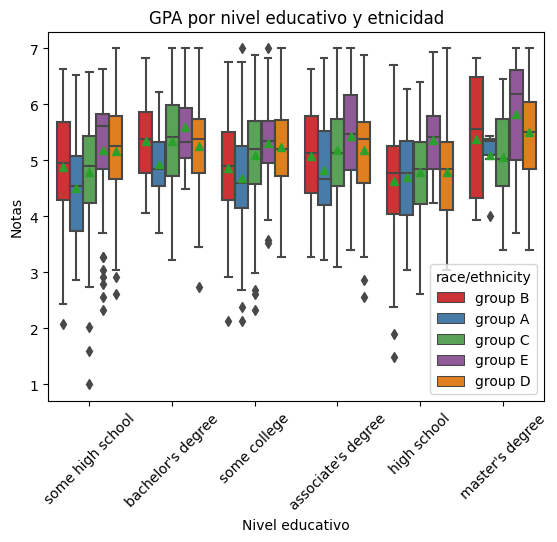

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melted DataFrame
melted_df = pd.melt(
    df_grades, 
    id_vars=['race/ethnicity', 'parental level of education'], 
    value_vars=['math score', 'reading score', 'writing score'], 
    var_name='Ramo', 
    value_name='Notas'
)

# Boxplot
sns.boxplot(data=melted_df, x='parental level of education', y='Notas', hue='race/ethnicity', palette='Set1', showmeans=True)

plt.title('GPA por nivel educativo y etnicidad')
plt.ylabel('Notas')
plt.xlabel('Nivel educativo')
plt.xticks(rotation=45)
plt.show()

> 1. ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?
> 2. ¿Este gráfico permite hacer facilmente un análisis conjunto de estas dos variables de forma sencilla?

**Justifique:**

```
1. Respecto al nivel educativo sí, claramente mejoran las notas a medida que aumenta el nivel educativo.
Respecto a la etnicidad también, se observa que el grupo C y D no tienen muy buenos resultados en general.

2. No tan sencillo, pero efectivamente se puede hacer el análisis.
```

# 3. Combinar Dataset [1 punto]

Mientras le notificaba por videollamada los resultados de sus descubrimientos a Don Caguayo, un exaltado practicante del area de TI entra a la reunión y les informa que ha encontrado una nueva base de datos que cuenta con las notas de dos asignaturas (en escala chilena): historia y ciencias. 
Para más remate, antes de huir, el practicante les cuenta que este dataframe lamentablemente contiene nuevamente los alumnos de los registros corruptos que ud. y su equipo filtraron en el análisis anterior.
 
 
El rector (evidentemente molesto por la situación) les ruega incluir estos datos (vaciados en el archivo other_grades.csv) al estudio original(`students_grades.csv`). 


Para esto, carge el archivo `other_grades.csv` y busque la forma de unir ambos DataFrames, de tal manera que las columnas de `history score` y `science score` se anexen al final del DataFrame original. **NO LIMPIE LOS DATOS**, si no que explore los distintos tipos de merge para encontrar el mas situable para su situación (y así evitar buscar duplicados).

**To-Do**

- [ ] Cargar el `other_grades.csv`
- [ ] Unir `df_grades` con `other_grades.csv` usando outer join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando left join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando right join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando inner join y explique el resultado.
- [ ] Defina cuál join es el que utilizará para generar el nuevo DataFrame.

> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.

### Carga de other grades

In [22]:
df_other = pd.read_csv("/content/drive/My Drive/U/11 Semestre/Lab Progra/Labs/Lab 5 Pandas 2/other_grades.csv")
df_other

,names,science score,history score
0,Pam Otoole,57,4.0
1,Diane Olson,48,4.8
2,Sarah Flannery,72,6.1
3,Stanley Chappell,47,3.7
4,Arnold Dodson,60,5.2
...,...,...,...
995,Melanie Acevedo,79,6.3
996,Christopher Wall,62,4.0
997,Margaret Spannaus,47,4.0
998,Vickie Sellers,47,5.7


### Outer Join

In [23]:
# Unir los dataframes utilizando la columna 'names' como clave
df_outer = pd.merge(df_grades, df_other, on='names', how='outer')
df_outer

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,school,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Leona Markow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,3.8
996,Maxine Gulbranson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,3.9
997,Jeane Budds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,3.9
998,Nancy Ramos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,6.2


Devuelve todas las filas de ambos DataFrames, rellenando con valores nulos en caso de no haber coincidencias.

### Left Join

In [24]:
# Unir los dataframes utilizando la columna 'names' como clave
df_left = pd.merge(df_grades, df_other, on='names', how='left')
df_left

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,school,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,school,62,4.2
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,school,16,3.6
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,college,59,4.1
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,school,43,4.3


Devuelve todas las filas del DataFrame de la izquierda y las filas coincidentes del DataFrame de la derecha.

### Right Join

In [25]:
# Unir los dataframes utilizando la columna 'names' como clave
df_right = pd.merge(df_grades, df_other, on='names', how='right')
df_right

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Pam Otoole,female,group B,bachelor's degree,standard,none,5.32,5.32,5.44,5.36,college,57,4.0
1,Diane Olson,female,group C,some college,standard,completed,5.14,6.40,6.28,5.94,school,48,4.8
2,Sarah Flannery,female,group B,master's degree,standard,none,6.40,6.70,6.58,6.56,postgraduate,72,6.1
3,Stanley Chappell,male,group A,associate's degree,free/reduced,none,3.82,4.42,3.64,3.96,college,47,3.7
4,Arnold Dodson,male,group C,some college,standard,none,5.56,5.68,5.50,5.58,school,60,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Melanie Acevedo,female,group E,master's degree,standard,completed,6.28,6.94,6.70,6.64,postgraduate,79,6.3
996,Christopher Wall,male,group C,high school,free/reduced,none,4.72,4.30,4.30,4.44,school,62,4.0
997,Margaret Spannaus,female,group C,high school,free/reduced,completed,4.54,5.26,4.90,4.90,school,47,4.0
998,Vickie Sellers,female,group D,some college,standard,completed,5.08,5.68,5.62,5.46,school,47,5.7


Devuelve todas las filas del DataFrame de la derecha y las filas coincidentes del DataFrame de la izquierda.

### Inner Join

In [26]:
# Unir los dataframes utilizando la columna 'names' como clave
df_inner = pd.merge(df_grades, df_other, on='names', how='inner')
df_inner

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,school,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,school,62,4.2
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,school,16,3.6
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,college,59,4.1
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,school,43,4.3


Devuelve solo las filas coincidentes en ambos DataFrames.

> **Justificación:**


```
Selección de Join: 

Outer o Left Join son los más apropiados, esto ya que es mejor tener
a todos los estudiantes en el Data Frame  (aunque no tengan notas en todas
las asignaturas), para poder entregar análisis estadisticos más completos.

```

## 2.1 Más visualizaciones [0.5 puntos]


<p align="center">
  <img src="https://media4.giphy.com/media/xT5LMWNOjGqJzUfyve/giphy.gif?cid=ecf05e47phkhvg6vadqvcoobvxwj9bzxxk38jjvkcc6eak6t&rid=giphy.gif&ct=g">
</p>




Genere dos visualizaciones extras que encuentre interesantes (y no triviales) con estos datos y explique sus resultados. Agrupe los atributos que estime convenientes.


**To-Do:**
- [ ] Generar dos nuevas visualizaciones con los datos y explicar que están representando.


> **NOTA: No utilice historia ni ciencias, son notas generadas aleatoriamente.**

### Correlación entre math score y reading score:

Coeficiente de correlación entre math score y reading score: 0.8137469180311038


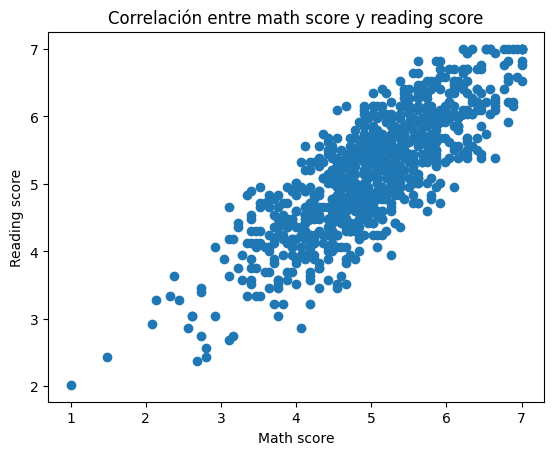

In [27]:
# calcular la matriz de correlación entre las columnas math score y reading score
corr_mat = df_grades[['math score', 'reading score']].corr()

# obtener el coeficiente de correlación entre las dos columnas
corr_coef = corr_mat.at['math score', 'reading score']

# imprimir el coeficiente de correlación
print(f'Coeficiente de correlación entre math score y reading score: {corr_coef}')

# crear un scatter plot para visualizar la relación entre las dos columnas
plt.scatter(df_grades['math score'], df_grades['reading score'])
plt.title('Correlación entre math score y reading score')
plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.show()

### Correlación entre math score y writing score:

Coeficiente de correlación entre math score y writing score: 0.8003867039622568


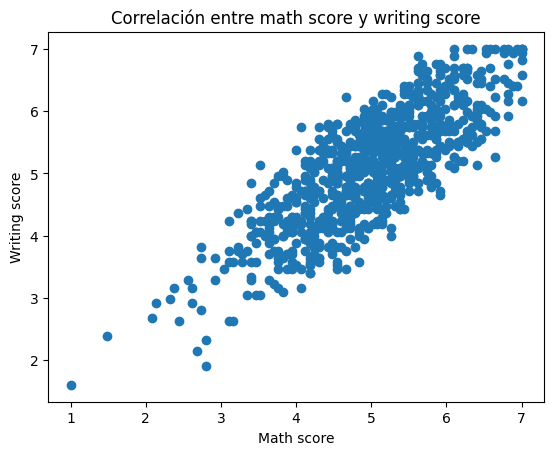

In [28]:
# calcular la matriz de correlación entre las columnas math score y writing score
corr_mat = df_grades[['math score', 'writing score']].corr()

# obtener el coeficiente de correlación entre las dos columnas
corr_coef = corr_mat.at['math score', 'writing score']

# imprimir el coeficiente de correlación
print(f'Coeficiente de correlación entre math score y writing score: {corr_coef}')

# crear un scatter plot para visualizar la relación entre las dos columnas
plt.scatter(df_grades['math score'], df_grades['writing score'])
plt.title('Correlación entre math score y writing score')
plt.xlabel('Math score')
plt.ylabel('Writing score')
plt.show()

La correlación mide relación lineal entre notas de matemáticas y lectura y escritura. Un coeficiente cercano a 1 indica correlación fuerte, mientras que cercano a 0 indica falta de correlación. Entonces podemos decir que los buenos alumnos en estos ramos son buenos en general, por otra parte el mejor resultado de math score puede tener varios motivos, pero entrega la buena conclusión general de los y las estudiantes.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y tienen hasta 3 días de atraso usando sus días comodín. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>